In [ ]:
!pip install --upgrade pip -q
!pip install -q ktrain

     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 6.8 MB 51.1 MB/s 
     |████████████████████████████████| 981 kB 54.0 MB/s 
     |████████████████████████████████| 263 kB 50.3 MB/s 
     |████████████████████████████████| 1.9 MB 51.4 MB/s 
     |████████████████████████████████| 1.2 MB 51.6 MB/s 
     |████████████████████████████████| 468 kB 44.9 MB/s 
     |████████████████████████████████| 883 kB 55.6 MB/s 
     |████████████████████████████████| 3.2 MB 42.5 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Generic
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings, gc
warnings.filterwarnings("ignore")


# Tensorflow
import tensorflow as tf

# ktrain
import ktrain
from ktrain import text

# sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
upload = files.upload()

Saving drugsComTest_raw.tsv to drugsComTest_raw.tsv


In [ ]:
from google.colab import files
upload = files.upload()

Saving drugsComTrain_raw.tsv to drugsComTrain_raw.tsv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 55 to 161046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   320 non-null    int64  
 1   drugName     320 non-null    object 
 2   condition    320 non-null    object 
 3   review       320 non-null    object 
 4   rating       320 non-null    float64
 5   date         320 non-null    objec

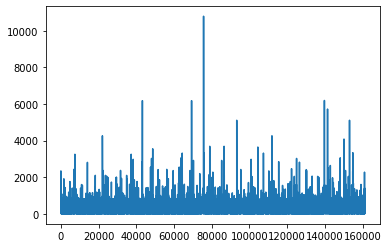

In [ ]:
df = pd.read_csv("drugsComTrain_raw.tsv", sep='\t')
df.info()
df['review'].str.len().plot()
maxer=df[df['review'].str.len()>1000]
maxer.info()

In [ ]:
df1 = pd.read_csv("drugsComTrain_raw.tsv", sep='\t')

df1.info()
p=df1[df1['review'].str.len()<=1000]
df1=p
drug1=pd.cut(df1.rating,bins=[0,8.00000,10],labels=[0,1],) 
df1.insert(3,'test',drug1) ##insert the review score
df1.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,1,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,0,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,0,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,0,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10


In [ ]:
df2 = pd.read_csv("drugsComTest_raw.tsv", sep='\t')

df2.info()
p=df2[df2['review'].str.len()<=1000]
df2=p
drug1=pd.cut(df2.rating,bins=[0,8.00000,10],labels=[0,1],) 
df2.insert(3,'test',drug1) ##insert the review score
df2.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,1,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",0,"""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,1,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,1,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35


In [ ]:
frames = [df1, df2]
df = pd.concat(frames)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214664 entries, 0 to 53765
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   214664 non-null  int64   
 1   drugName     214664 non-null  object  
 2   condition    213470 non-null  object  
 3   test         214664 non-null  category
 4   review       214664 non-null  object  
 5   rating       214664 non-null  float64 
 6   date         214664 non-null  object  
 7   usefulCount  214664 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 13.3+ MB


In [ ]:
from sklearn.model_selection import train_test_split

train, testing = train_test_split(df, test_size=0.2, random_state=41)

In [ ]:
df=train

In [ ]:
train["rating"].mean()

6.983736192067827

In [ ]:
train["rating"].median()

8.0

In [ ]:
testing["rating"].median()

8.0

In [ ]:
testing["rating"].mean()

7.013951971676799

In [ ]:
# Data Split
target = ['test']
data = ['review']

X = df[data]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [ ]:
# Common Parameters
max_len = 512
batch_size = 6
learning_rate = 5e-5
epochs = 12

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
# Data Split
target = ['test']
data = ['review']

X = df[data]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
# Transformer electra
model_ ="google/electra-base-discriminator"
t_mod = text.Transformer(model_, classes = [0,1], maxlen=512)


'''Converting split data to list [so it can processed]'''
#train
X_tr = X_train['review'].tolist()
y_tr = y_train['test'].tolist()

#test
X_ts = X_test['review'].tolist()
y_ts = y_test['test'].tolist()


# Pre-processing training & test data
train = t_mod.preprocess_train(X_tr,y_tr)
test = t_mod.preprocess_train(X_ts,y_ts)

# Model Classifier
model = t_mod.get_classifier()

learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=6)
learner.fit_onecycle(learning_rate, epochs = 14, callbacks=my_callbacks)
e = learner.validate(class_names=t_mod.get_classes())

preprocessing train...
language: en
train sequence lengths:
	mean : 84
	95percentile : 145
	99percentile : 153


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 84
	95percentile : 146
	99percentile : 153


Is Multi-Label? False


begin training using onecycle policy with max lr of 5e-05...
Epoch 1/14
22898/22898 [==============================] - 10363s 451ms/step - loss: 0.4041 - accuracy: 0.8158 - val_loss: 0.3658 - val_accuracy: 0.8559
Epoch 2/14
22898/22898 [==============================] - 10366s 451ms/step - loss: 0.3053 - accuracy: 0.8736 - val_loss: 0.3317 - val_accuracy: 0.8627
Epoch 3/14
22898/22898 [==============================] - 10363s 451ms/step - loss: 0.2515 - accuracy: 0.8999 - val_loss: 0.3123 - val_accuracy: 0.8788
Epoch 4/14
22898/22898 [==============================] - 10371s 452ms/step - loss: 0.2180 - accuracy: 0.9160 - val_loss: 0.3032 - val_accuracy: 0.8810
Epoch 5/14
22898/22898 [==============================] - 10359s 451ms/step - loss: 0.2017 - accuracy: 0.9236 - val_loss: 0.3260 - val_accuracy: 0.8797
Epoch 6/14
22898/22898 [==============================] - 10357s 451ms/step - loss: 0.2048 - accuracy: 0.9216 - val_loss: 0.3427 - val_accuracy: 0.8629
   

In [ ]:
predictor = ktrain.get_predictor(learner.model, t_mod)

In [ ]:
model_save_name = 'Electra.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
predictor.save(path)

In [ ]:
testing

,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
32329,29342,Topiramate,Migraine Prevention,0,"""It lessened the frequency of my migraines. Bu...",5.0,"February 9, 2016",34
121922,168380,Docusate / senna,"Constipation, Acute",1,"""I am on painkillers for my back and I don&#03...",10.0,"June 24, 2013",10
77463,9344,Lo Loestrin Fe,Birth Control,0,"""I have been on this pill for a little over 3 ...",1.0,"January 11, 2017",3
161077,210862,Mirtazapine,Insomnia,1,"""I took Remeron for the first time last night ...",9.0,"September 30, 2015",95
158571,49342,Ethinyl estradiol / levonorgestrel,Birth Control,0,"""I started with this pill to get off the shot ...",1.0,"March 1, 2016",6
...,...,...,...,...,...,...,...,...
20811,13144,Xolair,Urticaria,1,"""I have had CIU for over 13 years without remi...",10.0,"May 13, 2014",69
90793,161712,Remeron,Depression,1,"""Remeron is a unique medicine, since its side ...",10.0,"February 17, 2011",114
148980,226490,Etonogestrel,Birth Control,1,"""2nd insertion...period was irregular but beca...",9.0,"July 14, 2015",2
92390,217543,Clarithromycin,Bronchitis,1,"""My ailment wasn&#039;t actually bronchitis, b...",9.0,"January 20, 2014",41


In [ ]:
reloaded_predictor = ktrain.load_predictor(path)

In [ ]:
a=testing['review'].tolist()
a

['"It lessened the frequency of my migraines. But the side effects are not worth the relief it provided. It turned me into a zombie. I didn&#039;t care about anything. I couldn&#039;t even taste my food! And the worst part was it robbed me of my ability to be alarmed by the growing severity of my depression and other serious symptoms. After three months, I was GLAD to detox. 4 days clean and I can almost taste sugar again. Can&#039;t wait til the brain fog lifts."',
 '"I am on painkillers for my back and I don&#039;t know what I would do without these. You have to make to sure to take x2 pills every 12 hours for it to work right and don&#039;t miss taking them. They work, and work great."',
 '"I have been on this pill for a little over 3 months and I thought it was great at first but after a week on it I started feeling nauseous everyday and so tired. I also get random headaches and I thought it was from a cold but now I&#039;m sure it&#039;s the pill. I will be switching as soon as po

In [ ]:
c=predictor.predict(a)

In [ ]:
from pandas import DataFrame
df_pred = DataFrame(c,columns=['pred'])

In [ ]:
df_pred

,pred
0,0
1,1
2,0
3,0
4,0
...,...
42928,1
42929,1
42930,1
42931,1


In [ ]:
true=testing['test'].tolist()

In [ ]:
df_true = DataFrame(true,columns=['true'])
df_true.head()

,true
0,0
1,1
2,0
3,1
4,0


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
sklearn.metrics.confusion_matrix(df_true["true"], df_pred["pred"], labels=[0,1])

array([[20025,  1852],
       [ 4064, 16992]])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
sklearn.metrics.f1_score(df_true["true"], df_pred["pred"], labels=[0,1])

0.8517293233082707

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(df_true["true"],df_pred["pred"],labels=[1,0])

In [ ]:
matrix

'              precision    recall  f1-score   support\n\n           1       0.90      0.81      0.85     21056\n           0       0.83      0.92      0.87     21877\n\n    accuracy                           0.86     42933\n   macro avg       0.87      0.86      0.86     42933\nweighted avg       0.87      0.86      0.86     42933\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.90      0.81      0.85     21056
           0       0.83      0.92      0.87     21877

    accuracy                           0.86     42933
   macro avg       0.87      0.86      0.86     42933
weighted avg       0.87      0.86      0.86     42933


In [ ]:
testing.reindex()

,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
32329,29342,Topiramate,Migraine Prevention,0,"""It lessened the frequency of my migraines. Bu...",5.0,"February 9, 2016",34
121922,168380,Docusate / senna,"Constipation, Acute",1,"""I am on painkillers for my back and I don&#03...",10.0,"June 24, 2013",10
77463,9344,Lo Loestrin Fe,Birth Control,0,"""I have been on this pill for a little over 3 ...",1.0,"January 11, 2017",3
161077,210862,Mirtazapine,Insomnia,1,"""I took Remeron for the first time last night ...",9.0,"September 30, 2015",95
158571,49342,Ethinyl estradiol / levonorgestrel,Birth Control,0,"""I started with this pill to get off the shot ...",1.0,"March 1, 2016",6
...,...,...,...,...,...,...,...,...
20811,13144,Xolair,Urticaria,1,"""I have had CIU for over 13 years without remi...",10.0,"May 13, 2014",69
90793,161712,Remeron,Depression,1,"""Remeron is a unique medicine, since its side ...",10.0,"February 17, 2011",114
148980,226490,Etonogestrel,Birth Control,1,"""2nd insertion...period was irregular but beca...",9.0,"July 14, 2015",2
92390,217543,Clarithromycin,Bronchitis,1,"""My ailment wasn&#039;t actually bronchitis, b...",9.0,"January 20, 2014",41


In [ ]:
df=testing

In [ ]:
anxiety=df[df['condition']=='Anxiety']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42933 entries, 32329 to 49732
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   42933 non-null  int64   
 1   drugName     42933 non-null  object  
 2   condition    42719 non-null  object  
 3   test         42933 non-null  category
 4   review       42933 non-null  object  
 5   rating       42933 non-null  float64 
 6   date         42933 non-null  object  
 7   usefulCount  42933 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
anxiety.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 146585 to 92622
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   1542 non-null   int64   
 1   drugName     1542 non-null   object  
 2   condition    1542 non-null   object  
 3   test         1542 non-null   category
 4   review       1542 non-null   object  
 5   rating       1542 non-null   float64 
 6   date         1542 non-null   object  
 7   usefulCount  1542 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 98.0+ KB


In [ ]:
anxiety.head()

,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
146585,172691,Clonazepam,Anxiety,1,"""Klonopin helps me sleep, stop my mind from ra...",9.0,"March 4, 2015",32
129929,184136,Hydroxyzine,Anxiety,0,"""Got the prescription of the hydroxyzine 25mgs...",1.0,"August 29, 2016",24
139033,7551,Xanax,Anxiety,1,"""This is truly a cure all! As long as it&#039...",10.0,"September 21, 2016",61
26940,160492,Buspirone,Anxiety,1,"""Was put on busiprone when I went to the docto...",10.0,"November 19, 2015",7
106216,183641,Cymbalta,Anxiety,1,"""Cymbalta (and lots of prayers) saved my marri...",10.0,"September 26, 2009",28


In [ ]:
a=anxiety['review'].tolist()
a

['"Klonopin helps me sleep, stop my mind from racing, stop my chest pains and tremors. I have had severe anxiety for years. I have taken Xanax. Although Xanax is faster acting Klonopin lasts longer."',
 '"Got the prescription of the hydroxyzine 25mgs on a Friday.  Picked up my prescription on my way to work.  I took 1 pill.  I felt great and energetic before I took the pill and probably about 30-50 min., I was in sleep mode.  On Saturday, I took a pill in the morning...  just to see if it was really the new meds that caused me to feel this way.  Yes, same thing happened to me.... I developed extreme dry mouth, extremely tired ( worse than a hangover).  All I wanted to do is go lay in my bed and sleep.  I stopped taking this medication.  I had to work on Sunday evening.  This pill would not get out of my system.  I drank 2 cups of coffee, chugged water...  couldn&#039;t get the zombie/sleepy feeling out of my body.  BAD BAD MEDICINE!"',
 '"This is truly a cure all!  As long as it&#039;s

In [ ]:
c=predictor.predict(a)

In [ ]:
from pandas import DataFrame
df_pred = DataFrame(c,columns=['pred'])

In [ ]:
df_pred

,pred
0,1
1,0
2,1
3,0
4,1
...,...
1537,1
1538,0
1539,1
1540,0


In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pred    1542 non-null   int64
dtypes: int64(1)
memory usage: 12.2 KB


In [ ]:
true=anxiety['test'].tolist()

In [ ]:
df_true = DataFrame(true,columns=['true'])
df_true.head()

,true
0,1
1,0
2,1
3,1
4,1


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
sklearn.metrics.confusion_matrix(df_true["true"], df_pred["pred"], labels=[0,1])

array([[546, 103],
       [149, 744]])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
sklearn.metrics.f1_score(df_true["true"], df_pred["pred"], labels=[0,1])

0.8551724137931035

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(df_true["true"],df_pred["pred"],labels=[1,0])

In [ ]:
matrix

'              precision    recall  f1-score   support\n\n           1       0.88      0.83      0.86       893\n           0       0.79      0.84      0.81       649\n\n    accuracy                           0.84      1542\n   macro avg       0.83      0.84      0.83      1542\nweighted avg       0.84      0.84      0.84      1542\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.88      0.83      0.86       893
           0       0.79      0.84      0.81       649

    accuracy                           0.84      1542
   macro avg       0.83      0.84      0.83      1542
weighted avg       0.84      0.84      0.84      1542


In [ ]:
def speed():
  a=anxiety['review'].tolist()
  a

  c=predictor.predict(a)

  from pandas import DataFrame
  df_pred = DataFrame(c,columns=['pred'])

  df_pred

  true=anxiety['test'].tolist()

  df_true = DataFrame(true,columns=['true'])
  df_true.head()

  import sklearn
  from sklearn.metrics import confusion_matrix

  sklearn.metrics.confusion_matrix(df_true["true"], df_pred["pred"], labels=[0,1])

  from sklearn.metrics import f1_score

  sklearn.metrics.f1_score(df_true["true"], df_pred["pred"], labels=[0,1])

  from sklearn.metrics import classification_report
  matrix = classification_report(df_true["true"],df_pred["pred"],labels=[1,0])


  return matrix


In [ ]:
df["condition"].value_counts().head(50)

Birth Control                  7701
Depression                     2316
Pain                           1719
Anxiety                        1542
Acne                           1488
Bipolar Disorde                1089
Insomnia                       1055
Obesity                         966
Weight Loss                     918
ADHD                            892
Diabetes, Type 2                674
Emergency Contraception         666
High Blood Pressure             636
Vaginal Yeast Infection         608
Abnormal Uterine Bleeding       543
Bowel Preparation               507
Smoking Cessation               495
ibromyalgia                     486
Migraine                        449
Constipation                    421
Major Depressive Disorde        421
Anxiety and Stress              419
Chronic Pain                    403
Panic Disorde                   386
Migraine Prevention             371
Muscle Spasm                    342
Osteoarthritis                  321
Urinary Tract Infection     

In [ ]:
anxiety=df[df['condition']=='Birth Control']

In [ ]:
speed()

In [ ]:
anxiety=df[df['condition']=='Depression']

In [ ]:
speed()

In [ ]:
anxiety=df[df['condition']=='Pain']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.88      0.83      0.85       938\n           0       0.80      0.87      0.83       781\n\n    accuracy                           0.84      1719\n   macro avg       0.84      0.85      0.84      1719\nweighted avg       0.85      0.84      0.84      1719\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.88      0.83      0.85       938
           0       0.80      0.87      0.83       781

    accuracy                           0.84      1719
   macro avg       0.84      0.85      0.84      1719
weighted avg       0.85      0.84      0.84      1719


In [ ]:
              precision    recall  f1-score   support\n\n           1       0.88      0.83      0.85       938\n           0       0.80      0.87      0.83       781\n\n    accuracy                           0.84      1719\n   macro avg       0.84      0.85      0.84      1719\nweighted avg       0.85      0.84      0.84      1719\n

In [ ]:
anxiety=df[df['condition']=='Acne']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.89      0.82      0.86       816\n           0       0.81      0.88      0.84       672\n\n    accuracy                           0.85      1488\n   macro avg       0.85      0.85      0.85      1488\nweighted avg       0.85      0.85      0.85      1488\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.89      0.82      0.86       816
           0       0.81      0.88      0.84       672

    accuracy                           0.85      1488
   macro avg       0.85      0.85      0.85      1488
weighted avg       0.85      0.85      0.85      1488


In [ ]:
anxiety=df[df['condition']=='Bipolar Disorde']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.87      0.81      0.84       512\n           0       0.84      0.89      0.87       577\n\n    accuracy                           0.86      1089\n   macro avg       0.86      0.85      0.85      1089\nweighted avg       0.86      0.86      0.86      1089\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.87      0.81      0.84       512
           0       0.84      0.89      0.87       577

    accuracy                           0.86      1089
   macro avg       0.86      0.85      0.85      1089
weighted avg       0.86      0.86      0.86      1089


In [ ]:
anxiety=df[df['condition']=='Insomnia']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.88      0.78      0.82       499\n           0       0.82      0.90      0.86       556\n\n    accuracy                           0.84      1055\n   macro avg       0.85      0.84      0.84      1055\nweighted avg       0.85      0.84      0.84      1055\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.88      0.78      0.82       499
           0       0.82      0.90      0.86       556

    accuracy                           0.84      1055
   macro avg       0.85      0.84      0.84      1055
weighted avg       0.85      0.84      0.84      1055


In [ ]:
anxiety=df[df['condition']=='Weight Loss']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.90      0.85      0.87       581\n           0       0.76      0.85      0.80       337\n\n    accuracy                           0.85       918\n   macro avg       0.83      0.85      0.84       918\nweighted avg       0.85      0.85      0.85       918\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.90      0.85      0.87       581
           0       0.76      0.85      0.80       337

    accuracy                           0.85       918
   macro avg       0.83      0.85      0.84       918
weighted avg       0.85      0.85      0.85       918


In [ ]:
anxiety=df[df['condition']=='Obesity']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.84      0.81      0.82       550\n           0       0.76      0.79      0.77       416\n\n    accuracy                           0.80       966\n   macro avg       0.80      0.80      0.80       966\nweighted avg       0.80      0.80      0.80       966\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.84      0.81      0.82       550
           0       0.76      0.79      0.77       416

    accuracy                           0.80       966
   macro avg       0.80      0.80      0.80       966
weighted avg       0.80      0.80      0.80       966


In [ ]:
anxiety=df[df['condition']=='ADHD']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.93      0.79      0.86       443\n           0       0.82      0.94      0.88       449\n\n    accuracy                           0.87       892\n   macro avg       0.87      0.87      0.87       892\nweighted avg       0.87      0.87      0.87       892\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.93      0.79      0.86       443
           0       0.82      0.94      0.88       449

    accuracy                           0.87       892
   macro avg       0.87      0.87      0.87       892
weighted avg       0.87      0.87      0.87       892


In [ ]:
anxiety=df[df['condition']=='Diabetes, Type 2']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.90      0.73      0.81       299\n           0       0.81      0.93      0.87       375\n\n    accuracy                           0.84       674\n   macro avg       0.86      0.83      0.84       674\nweighted avg       0.85      0.84      0.84       674\n'